# About Dataset
Description:

The Dangerous Farm Insects Image Dataset is a curated collection of images featuring 15 different types of insects commonly found in agricultural settings. This dataset provides valuable visual resources for studying, identifying, and understanding the characteristics of these potentially harmful insects. Each insect is represented by multiple high-quality images, showcasing their distinct features, colors, and patterns.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
import pathlib
data_dir = pathlib.Path('Images')
data_dir

WindowsPath('Images')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1464


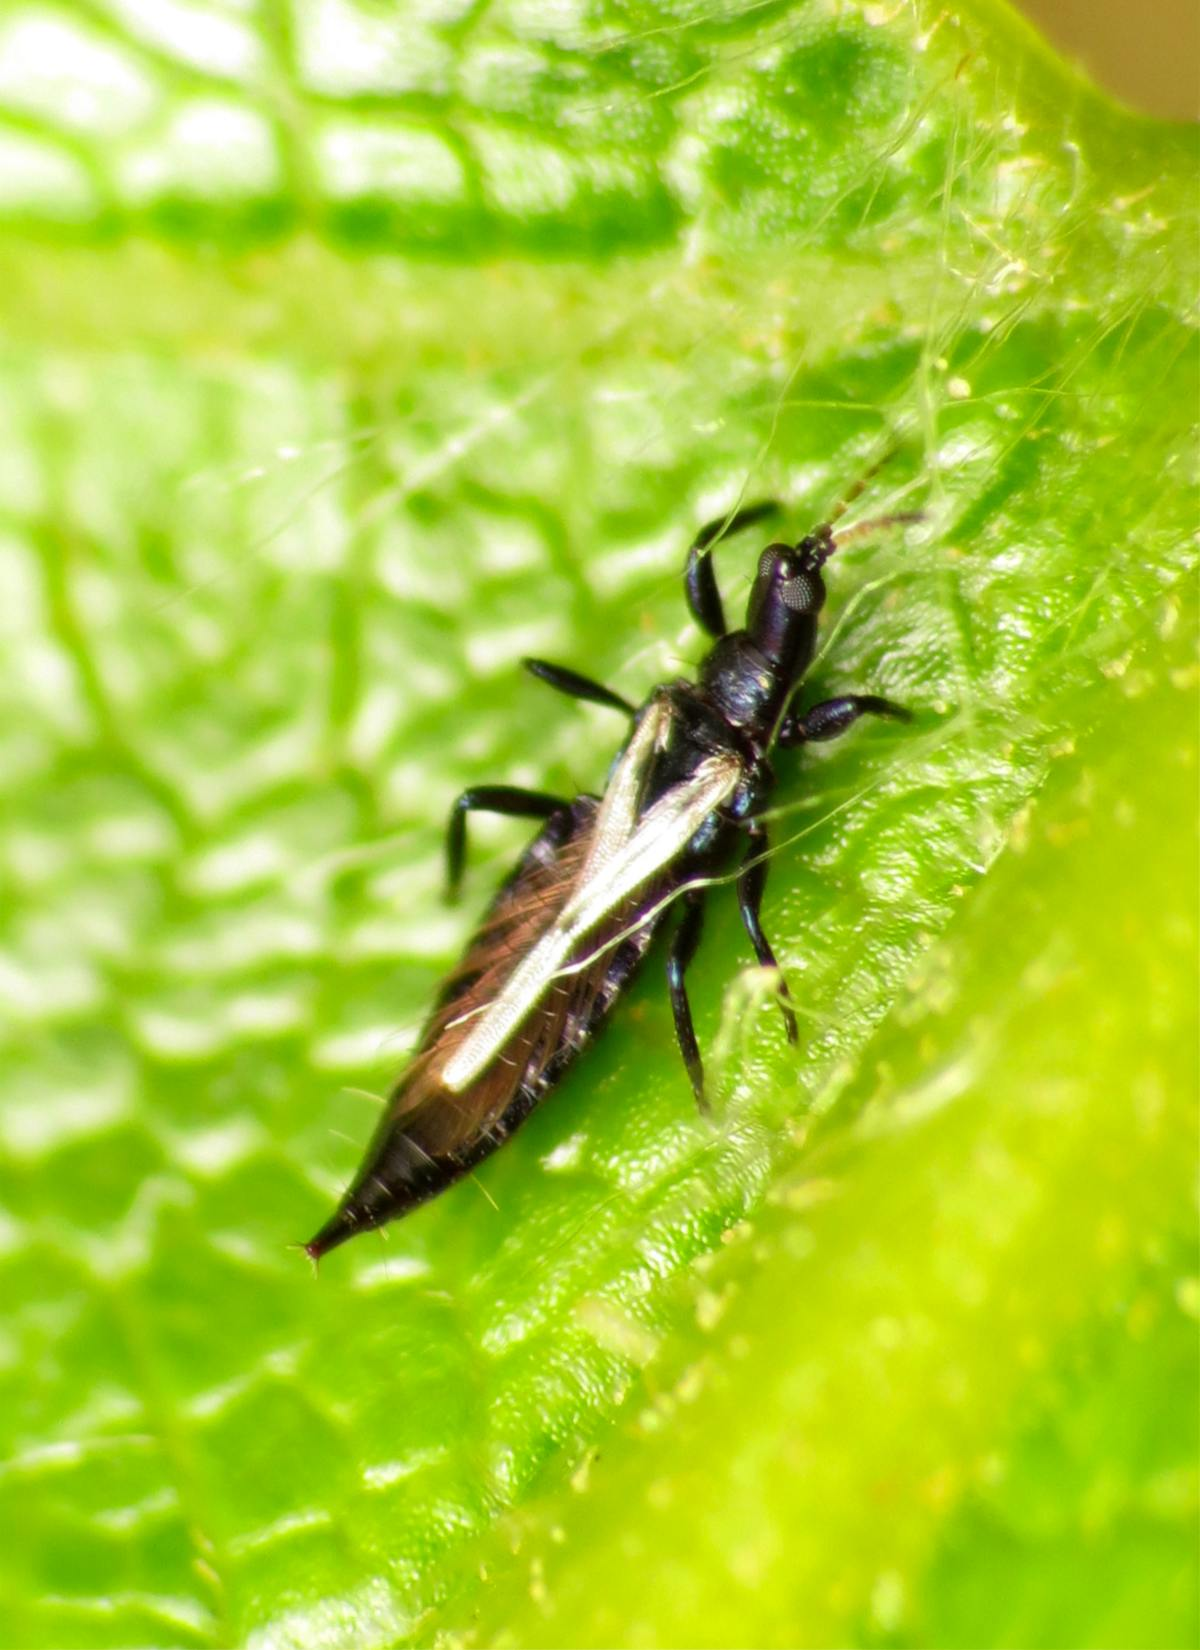

In [4]:
thrips = list(data_dir.glob('Thrips/*'))
PIL.Image.open(str(thrips[0]))

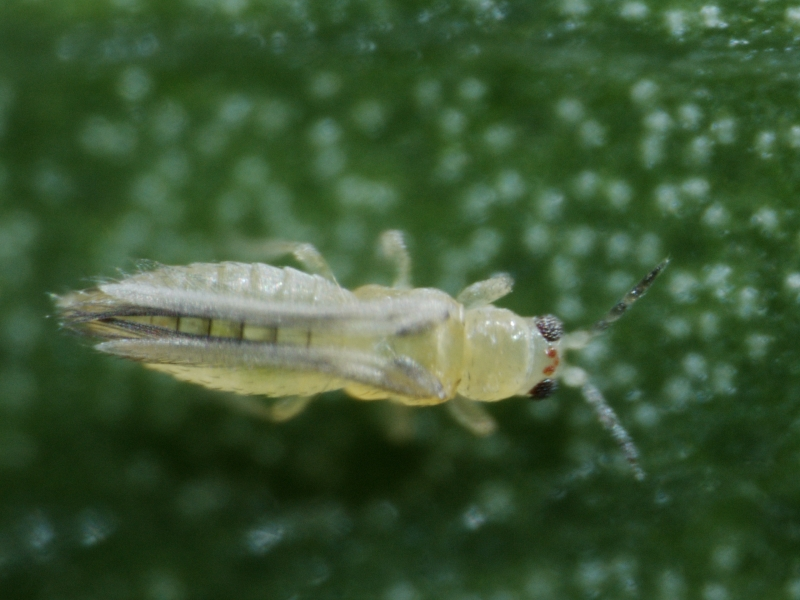

In [5]:
PIL.Image.open(str(thrips[1]))

# Create a dataset

In [6]:
# Define some parameters for the loader:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed = 999,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 1591 files belonging to 15 classes.
Using 1273 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed = 999,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 1591 files belonging to 15 classes.
Using 318 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Africanized Honey Bees (Killer Bees)', 'Aphids', 'Armyworms', 'Brown Marmorated Stink Bugs', 'Cabbage Loopers', 'Citrus Canker', 'Colorado Potato Beetles', 'Corn Borers', 'Corn Earworms', 'Fall Armyworms', 'Fruit Flies', 'Spider Mites', 'Thrips', 'Tomato Hornworms', 'Western Corn Rootworms']


# Visualize the data

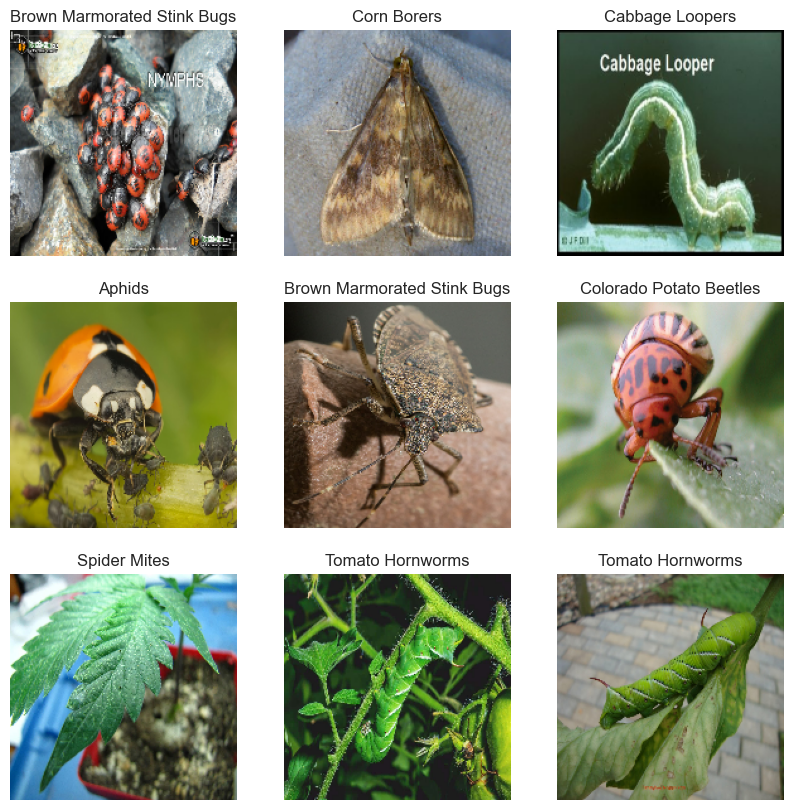

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [12]:
# Configure the dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Creating the model

In [13]:
num_classes = len(class_names)

In [14]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 15s 284ms/step - loss: 2.8306 - accuracy: 0.0644 - val_loss: 2.7034 - val_accuracy: 0.0755
Epoch 2/10
40/40 [==============================] - 10s 262ms/step - loss: 2.6638 - accuracy: 0.1233 - val_loss: 2.6314 - val_accuracy: 0.1132
Epoch 3/10
40/40 [==============================] - 10s 259ms/step - loss: 2.3932 - accuracy: 0.2467 - val_loss: 2.4661 - val_accuracy: 0.2013
Epoch 4/10
40/40 [==============================] - 11s 281ms/step - loss: 1.8926 - accuracy: 0.4014 - val_loss: 2.3695 - val_accuracy: 0.2484
Epoch 5/10
40/40 [==============================] - 10s 256ms/step - loss: 1.3107 - accuracy: 0.6009 - val_loss: 2.4648 - val_accuracy: 0.3113
Epoch 6/10
40/40 [==============================] - 10s 254ms/step - loss: 0.8426 - accuracy: 0.7565 - val_loss: 2.8131 - val_accuracy: 0.3145
Epoch 7/10
40/40 [==============================] - 10s 255ms/step - loss: 0.5198 - accuracy: 0.8586 - val_loss: 3.5621 - val_accuracy: 0.2956

### Save the model

In [18]:
model.save('insect_model')

INFO:tensorflow:Assets written to: insect_model\assets


INFO:tensorflow:Assets written to: insect_model\assets


# Visualize training results

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

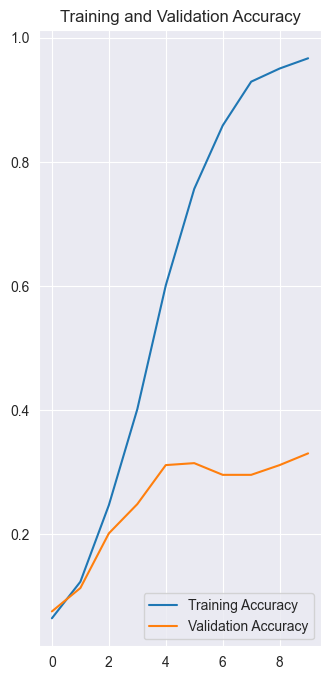

In [20]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

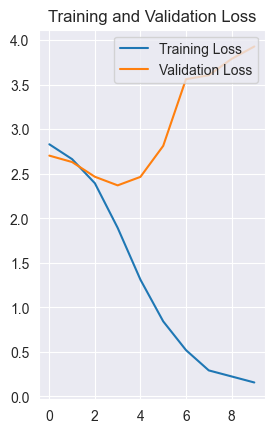

In [21]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Data Augmentation

In [22]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [23]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [26]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 13s 305ms/step - loss: 2.7133 - accuracy: 0.0809 - val_loss: 2.6763 - val_accuracy: 0.1226
Epoch 2/10
40/40 [==============================] - 12s 305ms/step - loss: 2.6557 - accuracy: 0.1170 - val_loss: 2.7563 - val_accuracy: 0.1164
Epoch 3/10
40/40 [==============================] - 11s 284ms/step - loss: 2.5646 - accuracy: 0.1579 - val_loss: 2.5339 - val_accuracy: 0.1258
Epoch 4/10
40/40 [==============================] - 11s 287ms/step - loss: 2.4910 - accuracy: 0.1603 - val_loss: 2.5468 - val_accuracy: 0.1541
Epoch 5/10
40/40 [==============================] - 12s 290ms/step - loss: 2.4315 - accuracy: 0.2019 - val_loss: 2.5734 - val_accuracy: 0.2013
Epoch 6/10
40/40 [==============================] - 12s 310ms/step - loss: 2.3183 - accuracy: 0.2443 - val_loss: 2.5566 - val_accuracy: 0.2013
Epoch 7/10
40/40 [==============================] - 12s 289ms/step - loss: 2.2395 - accuracy: 0.2804 - val_loss: 2.4757 - val_accuracy: 0.2453

### Save the model

In [27]:
model.save('insect_model_aug')

INFO:tensorflow:Assets written to: insect_model_aug\assets


INFO:tensorflow:Assets written to: insect_model_aug\assets


# Visualize training results

Text(0.5, 1.0, 'Training and Validation Accuracy')

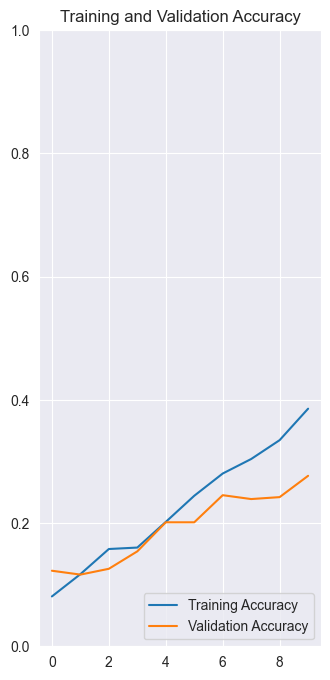

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

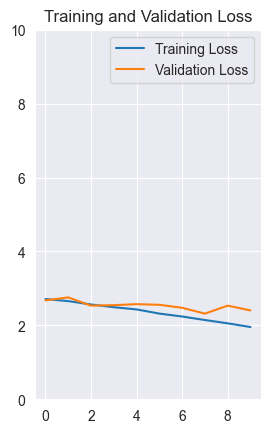

In [29]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.ylim(0,10)
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')